# AMES HOUSE PRICE PREDICTION

## Imports

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn import feature_selection as fs

## Training Data Load

In [2]:
df = pd.read_csv("../Dataset/train.csv")

## Data Exploration

In [3]:
df.shape

(2197, 82)

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1218.0,1218.0,GasA,Ex,Y,SBrkr,1218,0,0,1218,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2007.0,RFn,2.0,576.0,TA,TA,Y,0,178,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd,TA,Mn,ALQ,485.0,BLQ,177.0,1496.0,2158.0,GasA,Gd,Y,SBrkr,2196,0,0,2196,0.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,3.0,701.0,TA,TA,Y,84,70,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,BrkFace,500.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1451.0,1451.0,GasA,Ex,Y,SBrkr,1456,0,0,1456,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2008.0,RFn,2.0,539.0,TA,TA,Y,192,42,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,241.0,Rec,113.0,30.0,384.0,GasA,Ex,Y,SBrkr,744,630,0,1374,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2004.0,Fin,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [7]:
df.describe(include = 'all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2197.000000,2.197000e+03,2197.000000,2197,1835.000000,2197.000000,2197,143,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197.000000,2197.000000,2197.000000,2197.000000,2197,2197,2197,2197,2175,2175.000000,2197,2197,2197,2130,2130,2128,2130,2196.000000,2129,2196.000000,2196.000000,2196.000000,2197,2197,2197,2196,2197.000000,2197.00000,2197.000000,2197.000000,2196.000000,2196.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197,2197.000000,2197,2197.000000,1131,2077,2075.000000,2075,2196.000000,2196.000000,2075,2075,2197,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,12,419,80,2197.000000,2197.000000,2197.000000,2197,2197,2197.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,17,5,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,Gd,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,1704,NaN,NaN,2188,87,1389,1983,2194,1597,2091,324,1894,2175,1815,1123,NaN,NaN,NaN,NaN,1735,2166,790,782,1307,NaN,1321,1922,1001,930,1970,1406,664,NaN,1871,NaN,NaN,NaN,2158,1126,2048,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1105,NaN,2037,NaN,564,1318,NaN,902,NaN,NaN,1957,1993,1986,NaN,NaN,NaN,NaN,NaN,NaN,4,243,72,NaN,NaN,NaN,1898,1809,NaN
mean,1460.512517,7.127872e+08,57.064178,NaN,69.549319,10268.070096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.116523,5.552572,1972.030951,1984.781065,NaN,NaN,NaN,NaN,NaN,105.101609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,445.502277,NaN,49.341985,567.176685,1062.020947,NaN,NaN,NaN,NaN,1171.744652,331.93218,4.196632,1507.873464,0.425774,0.063297,1.592626,0.369595,2.858898,1.049158,NaN,6.470642,NaN,0.598999,NaN,NaN,1978.890120,NaN,1.781876,476.715847,NaN,NaN,NaN,92.436959,48.768320,22.393719,2.361402,15.954028,2.789713,NaN,NaN,NaN,57.404188,6.189804,2007.793810,NaN,NaN,182376.851161
std,846.537251,1.887751e+08,42.360690,NaN,23.188224,7975.740885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.429613,1.107019,30.450069,20.898245,NaN,NaN,NaN,NaN,NaN,184.897165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465.845264,NaN,170.644815,445.327392,456.535482,NaN,NaN,NaN,NaN,398.204596,430.76106,45.896142,511.844406,0.524958,0.249100,0.553347,0.500405,0.834769,0.224512,NaN,1.591381,NaN,0.647862,NaN,NaN,25.753701,NaN,0.762599,215.999290,NaN,NaN,NaN,121.422842,69.127588,62.063281,22.843004,56.495484,39.991010,NaN,NaN,NaN,639.103790,2.746902,1.314345,NaN,NaN,81168.157405
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.00000

In [17]:
pd.set_option('display.max_rows', 100)
pd.DataFrame((df.count()/df.shape[0])*100 , columns=['Coverage'])
#pd.DataFrame(((df.count()-df.isnull().sum())/df.count())*100 , columns=['Coverage'])

,Coverage
Order,100.000000
PID,100.000000
MS SubClass,100.000000
MS Zoning,100.000000
Lot Frontage,83.522986
Lot Area,100.000000
Street,100.000000
Alley,6.508876
Lot Shape,100.000000
Land Contour,100.000000


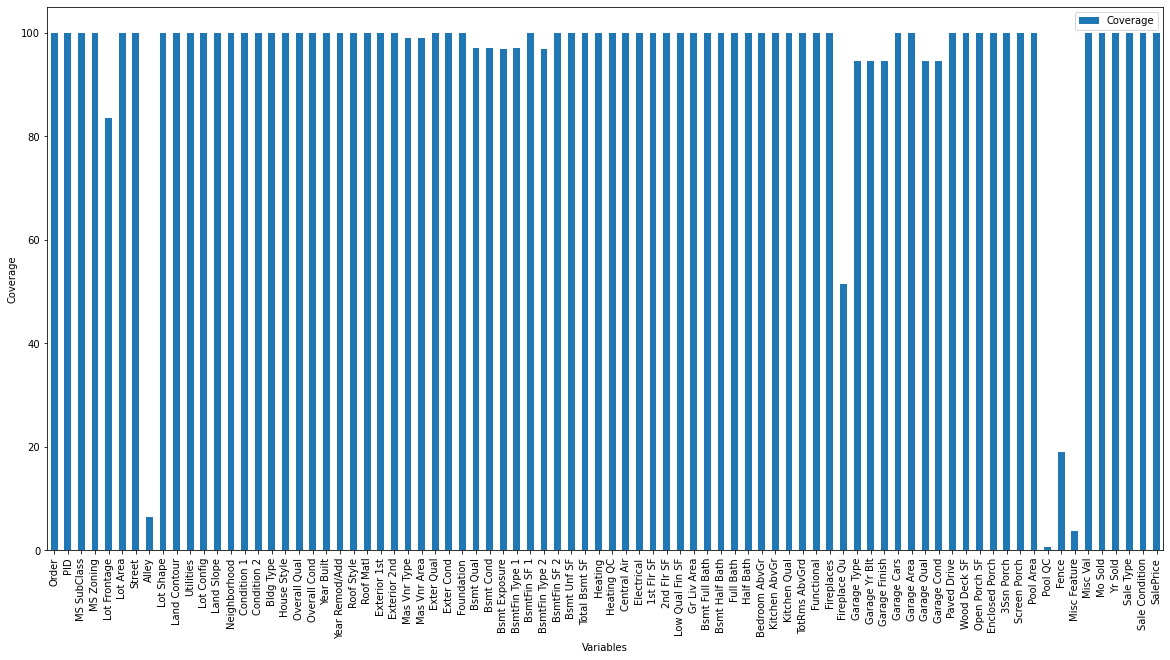

In [22]:
ax = pd.DataFrame((df.count()/df.shape[0])*100 , columns=['Coverage']).plot(kind = 'bar' , figsize = (20,10))
ax.set(xlabel = 'Variables' , ylabel = 'Coverage')
plt.show()

## Feature Selection

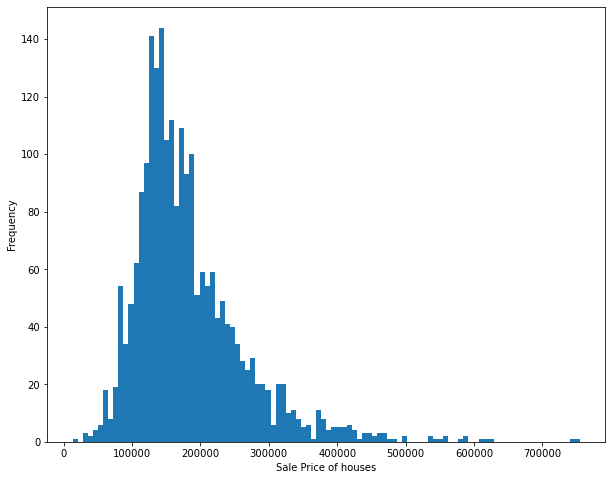

In [29]:
df["SalePrice"].plot.hist(bins = 100 , figsize = (10 , 8)).set(xlabel = 'Sale Price of houses')
plt.show()

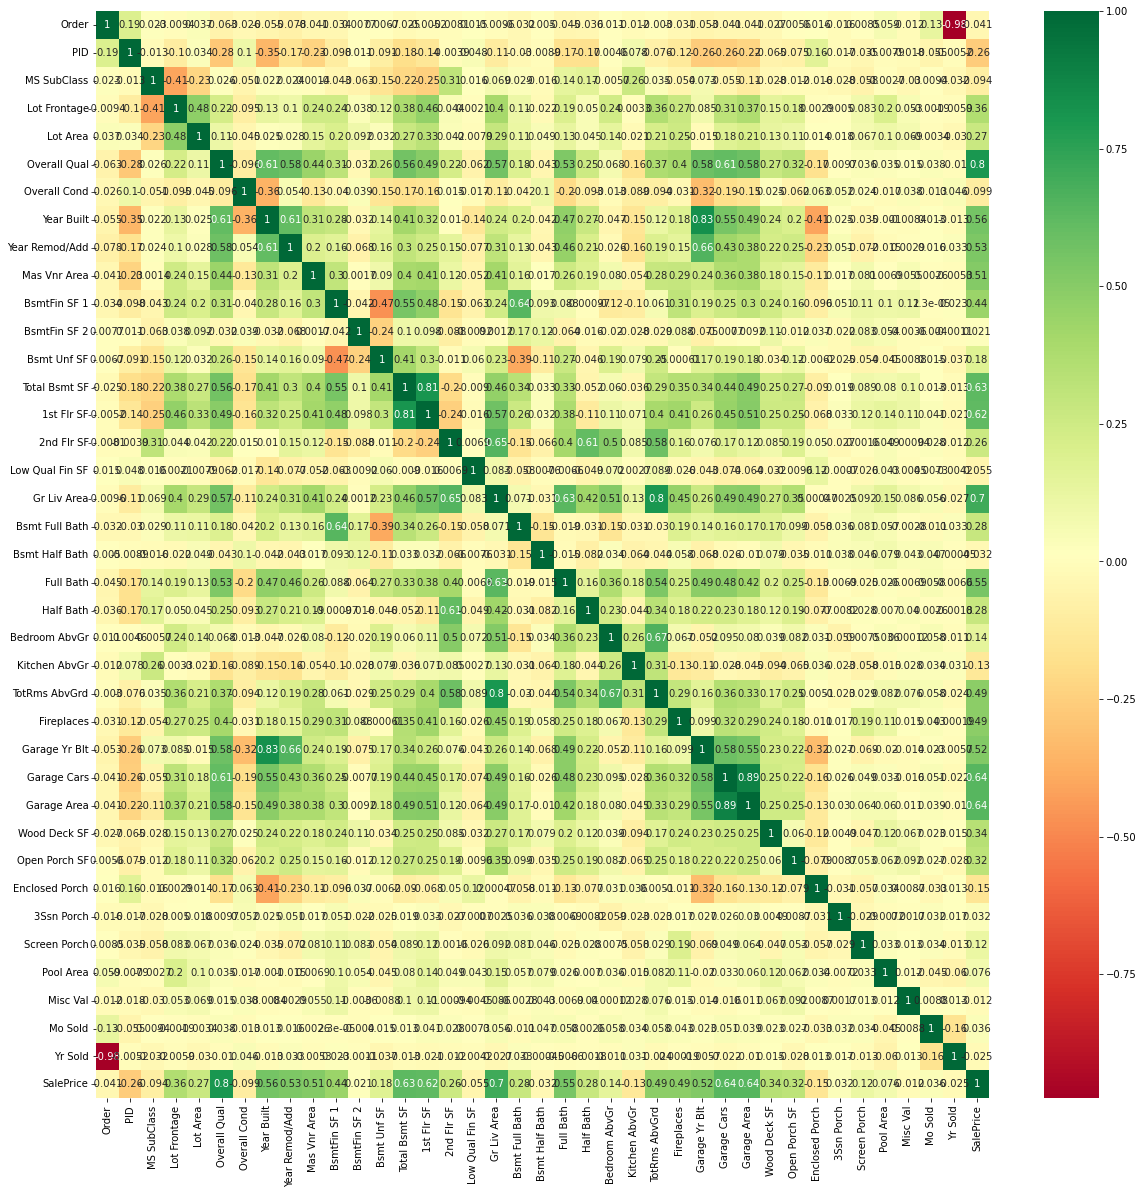

In [47]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
df_new = fs.SelectKBest(fs.chi2, k=20).fit_transform(df, df["SalePrice"])
df_new.shape